In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

data_path = r"../data/processed/all_data.csv"

In [11]:
# load data into dataframe
df = pd.read_csv(data_path)
df.reset_index()
df = df.drop(df.columns[0], axis=1)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [40]:
display(df.head(7))
print("Total messages: ", len(df))

,timedate,sender,text
0,"26.05.19, 13:14",Nimrod W,Dan cookson can dew if\n
1,"26.05.19, 13:14",Nimrod W,It\n
2,"26.05.19, 13:15",Alex Friend,Gotcha\n
3,"26.05.19, 13:15",Alex Friend,Will deliver\n
4,"26.05.19, 13:15",Nimrod W,Amazing\n
5,"26.05.19, 13:15",Nimrod W,This will change my life\n
6,"26.05.19, 13:15",Nimrod W,I will start a yt channel called 'oxidised br...


Total messages:  161822


In [27]:
# let's have a little look at some of the stats
df[['sender','text']].groupby(['sender']).count().sort_values(by='text', ascending=False).head(10)

,text
sender,
Nimrod W,54188
Yoav Wynne,17255
Annika Guez,16217
Eytan Merkier,8087
Walt Trustam,7179
Avishai Wynne,6727
Scott Fielding,6542
Judy Peritz-Wynne (Mum),6258
Jonathan Wynne (Dad),4740


In [47]:
message_lengths = df['text'].str.len().to_list()
mean_len = np.mean(message_lengths)
print("Mean Message Length: ", np.round(mean_len))
print("Minumum and Maximum: ", np.min(message_lengths), ", ", np.max(message_lengths))
print("Median length: ", np.median(message_lengths))

Mean Message Length:  31.0
Minumum and Maximum:  3 ,  2947
Median length:  25.0


In [69]:
print(df.loc[df['text'].str.len() > 200])

               timedate         sender                                               text
1701    12.09.20, 00:52       Nimrod W   https//www.reddit.com/r/Cooking/comments/g7rw...
2961    23.12.20, 01:01  Eytan Merkier   Tangent which wasn't completed due to my drun...
2963    23.12.20, 01:07  Eytan Merkier   I think this is just my personality/ characte...
2971    23.12.20, 09:04       Nimrod W   https//www.mitgaisim.idf.il/%D7%9B%D7%AA%D7%9...
3383    22.02.21, 10:33       Nimrod W   https//l.messenger.com/l.php?u=https%3A%2F%2F...
...                 ...            ...                                                ...
156709  18.02.22, 15:10       Nimrod W   https//www.idf.il/%d7%90%d7%aa%d7%a8%d7%99-%d...
156831  04.03.22, 08:10  Eytan Merkier   Nimrooodddd, happy birthday, enjoy the day wi...
158835  21.10.22, 12:41       Nimrod W   its the pantry closet, we let the situation g...
160038  29.07.22, 13:00       Nimrod W   https//www.google.com/url?sa=t&source=web&rct...
161652  27

Here we see the distribution of message lengths. Plotting using a log scale we can see a that most messages there are a small minority of very long messages

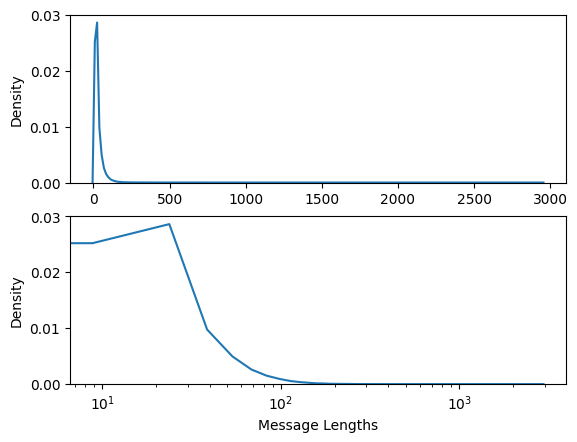

In [64]:
# let's have a look at the distributions of the message lengths
fig, ax = plt.subplots(2)
plt.xlabel("Message Lengths")
sns.kdeplot(message_lengths, ax=ax[0])
sns.kdeplot(message_lengths, ax=ax[1]) 
ax[1].set_xscale('log')
plt.show()

In [70]:
# let's have a look at the times that messages were sent at
# maybe hour of day vs number of messages?